In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Predicting Medical Costs

### Context

We are working with a made-up nonprofit aimed at helping people lower medical costs. Provided is a dataset with various characteristics of a person as well as how much they were charged. 

We want to predict which features have the most significant impact on how much someone is charged so we can best help our patients using information we already know.

### About the Data

There are 1,338 entries with the following columns:
- __age__: age of primary beneficiary
- __sex__: insurance contractor gender, female or male
- __bmi__: body mass index, providing an understanding of body weights that are high or low relative to height
- __children__: # of children covered by health insurace / # of dependents
- __smoker__: does the primary beneficiary smoke
- __region__: the beneficiary's residential area in the continental US, northeast, southeast, southwest, or northwest
- __charges__: individual medical costs billed by insurance

There are __no__ null values in this dataset which is contained at the file in *fp* below.

In [16]:
fp = os.path.join('data', 'costs.csv')
costs = pd.read_csv(fp)

### Q1. Data Cleaning and Querying

We want to know the relationship between features. To make that easier for analysis, can you help us change the smoker column to be *boolean*?

We are also interested in analyzing how much of an impact someone's BMI has on their insurance costs. The CDC defines someone who is overweight as having a BMI of 30.0 or higher. Could you help us look for entries with only overweight individuals __without__ modifying the original dataset?

In [70]:
costs['smoker'] = costs['smoker'].replace({'yes': True, 'no': False})

In [78]:
costs['bmi'] = costs['bmi'].str.strip("'").apply(float)
overweight = costs.copy()
overweight = overweight.query('bmi >= 30.0')

In [79]:
overweight.head()

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.77,1,False,southeast,1725.5523
2,28,male,33.00,3,False,southeast,4449.4620
6,46,female,33.44,1,False,southeast,8240.5896
12,23,male,34.40,0,False,southwest,1826.8430
13,56,female,39.82,0,False,southeast,11090.7178


### Q2. Simple Linear Regression

##### Simple linear regression is a model that estimates the relationship between a dependent and an independent variable. It is defined as:

### $y = \hat{\beta}_{0} + \hat{\beta}_{1}x$

We seem to have forgotten how to calculate these coefficients. Do you think you could help us calculate $\hat{\beta}_{0}$ and $\hat{\beta}_{1}$ for *bmi* and *charges* for the whole dataset?

In [82]:
bmis = costs['bmi']
charges = costs['charges']
bmi_mean = bmis.mean()
charges_mean = charges.mean()

In [155]:
Sxy = 0
Sxx = 0
for _ in range(costs.shape[0]):
    x = bmis.iloc[_]
    y = charges.iloc[_]
    Sxy += (x - bmi_mean) * (y - charges_mean)
    Sxx += (x - bmi_mean) * (x - bmi_mean)

In [156]:
beta1 = Sxy / Sxx
beta0 = charges_mean - beta1 * bmi_mean
beta0, beta1

(1192.937208961157, 393.87303079739496)

In [90]:
from sklearn.linear_model import LinearRegression

In [120]:
reg = LinearRegression().fit(np.array(bmis).reshape(-1, 1), np.array(charges).reshape(-1, 1))

In [121]:
{'beta0': reg.intercept_, 'beta1': reg.coef_}

{'beta0': array([1192.93720896]), 'beta1': array([[393.8730308]])}

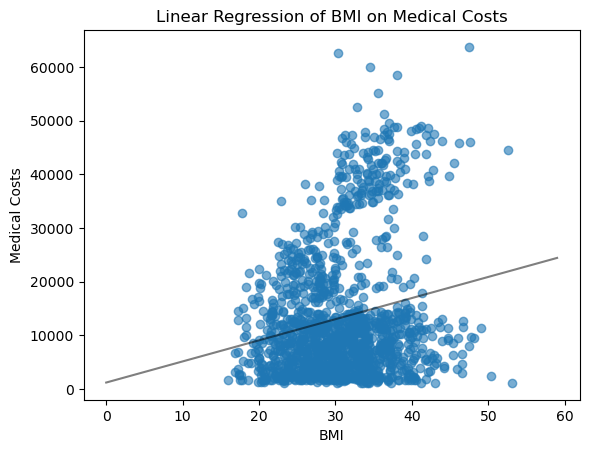

In [182]:
plt.plot(reg.predict(np.arange(60).reshape(-1, 1)), alpha=0.5, color="black")
plt.scatter(bmis, charges, alpha=0.6)
plt.ylabel('Medical Costs')
plt.xlabel('BMI')
plt.title('Linear Regression of BMI on Medical Costs')
plt.show()